In [14]:
import sys
from nn_visualize import draw_graph
from mlp_model  import MLP
from mlp_value import Value
import random
sys.path.append("..")

In [2]:
def mean_squared_error_loss(y_actual, y_prediction):
    error = 0
    for ya, yp in zip(y_actual, y_prediction):
        diff = (yp - ya)
        error += diff ** 2
    return  error / len(y_actual)

def calculate_loss(mlp, X, y, iter=10):
    for i in range(iter):
        # forward pass
        y_prediction =  [mlp(x) for x in X]
        loss = mean_squared_error_loss(y, y_prediction)
        print(f"[{i}] loss: {loss.data}")

        for p in mlp.parameters():
            p.gradient = 0.0
        # backward pass
        loss.backward()

        # update
        for p in mlp.parameters():
            p.data =  p.data -  0.01 * p.gradient
        
if __name__ == "__main__":
    from mlp_model  import MLP

    mlp = MLP(3, [4, 4, 1]) # model

    X = [
        [2.0, 3.0, -1.0],
        [3.0, -1.0, 0.5],
        [0.5, 1.0, 1.0],
        [1.0, 1.0, -1.0],
    ] # 4 forward passes
    y = [1.0, -1.0, -1.0, 1.0] # desired targets
    
    calculate_loss(mlp, X, y, iter=20)

[0] loss: 1.3953094779289956
[1] loss: 1.3812517613001998
[2] loss: 1.3672229172104808
[3] loss: 1.3532254465188227
[4] loss: 1.33925854607646
[5] loss: 1.325317884334801
[6] loss: 1.3113953798966071
[7] loss: 1.297478971385635
[8] loss: 1.2835523647561322
[9] loss: 1.2695947419553026
[10] loss: 1.2555804126023926
[11] loss: 1.2414783879557885
[12] loss: 1.227251853809006
[13] loss: 1.212857516031188
[14] loss: 1.1982447892812527
[15] loss: 1.183354796185231
[16] loss: 1.1681191414977707
[17] loss: 1.1524584245497416
[18] loss: 1.1362804556467474
[19] loss: 1.119478151673721


In [7]:
from nn_visualize import draw_graph

In [12]:
from mlp_model  import MLP

mlp = MLP(3, [4, 4, 1]) # model

X = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
] # 4 forward passes
y = [1.0, -1.0, -1.0, 1.0] # desired targets



In [13]:
y_prediction =  [mlp(x) for x in X]
loss = mean_squared_error_loss(y, y_prediction)
loss

Value(data=0.9435081751100014, gradient=0.0)

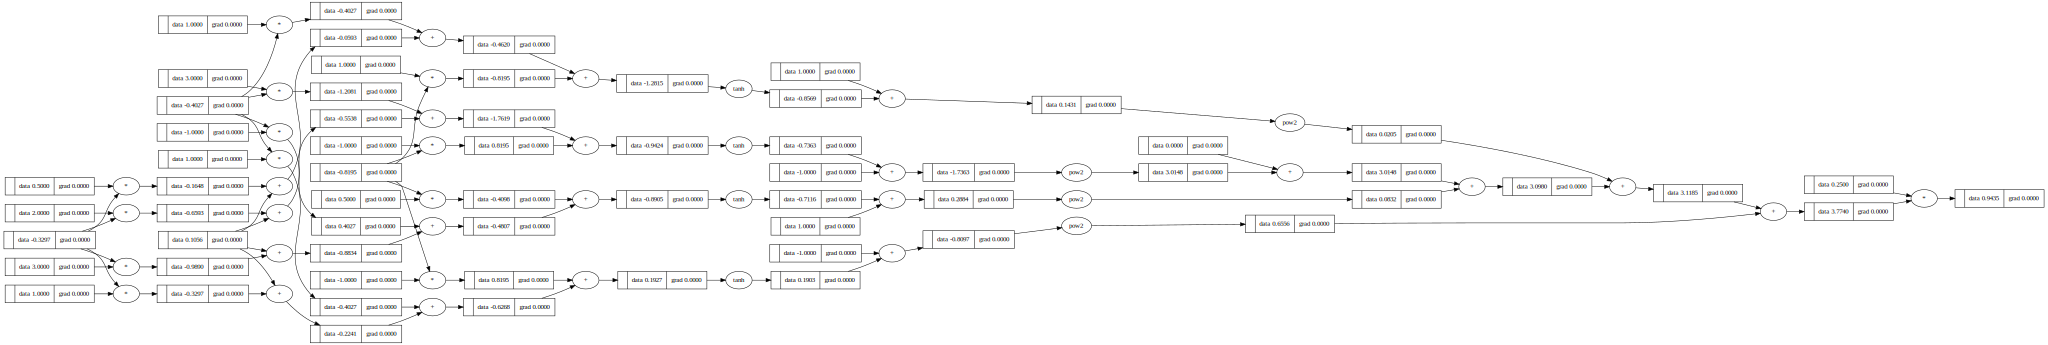

In [14]:
draw_graph(loss)

In [15]:
loss.backward()

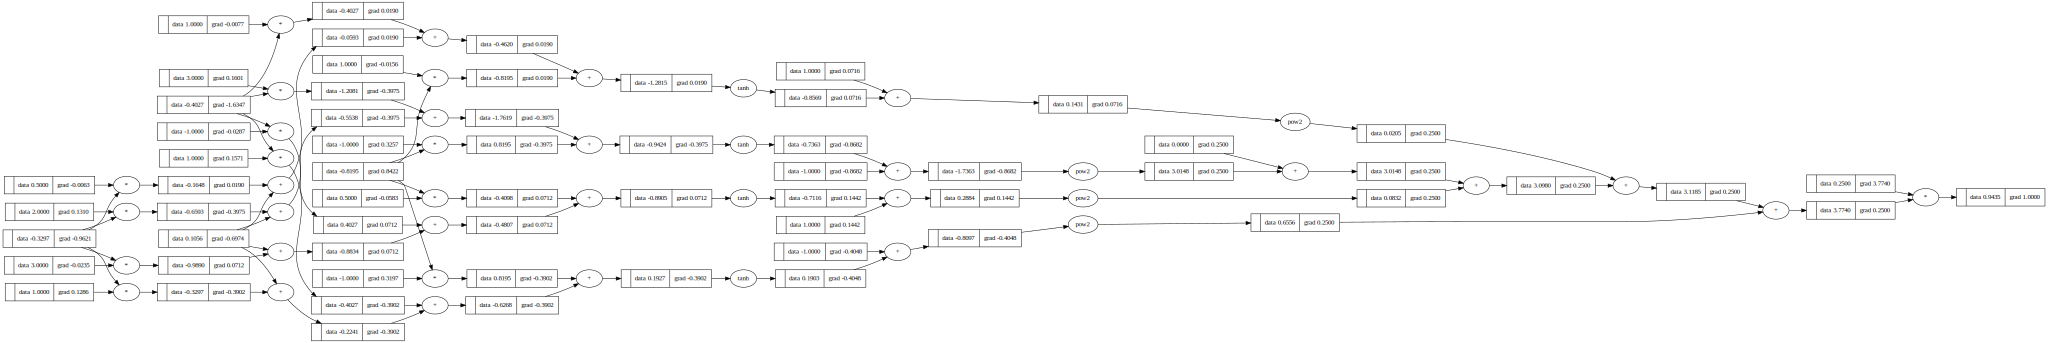

In [16]:
draw_graph(loss)

In [10]:
x = Value(2.0)
y = Value(-3.0)

w = -1
b = 0
f = w * x + b

loss = ((f - y)**2)

print(f"loss: {loss}")

f.backward()

loss: Value(data=1.0, gradient=0.0)


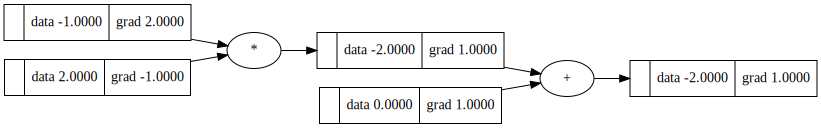

In [12]:
draw_graph(f)

In [15]:

x = [Value(1.0), Value(10.0), Value(-9.0), Value(4.0)]
w = [Value(random.uniform(-1, 1)) for _ in range(4)]
b = 0
f = sum((wi * xi for xi, wi in zip(x, w)), b)

f.backward()

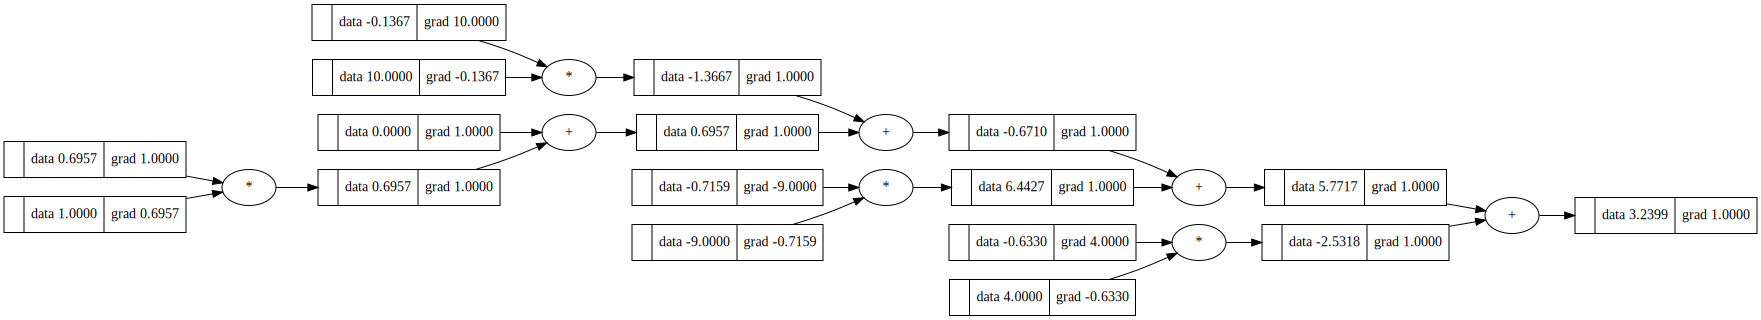

In [16]:
draw_graph(f)

In [21]:
import torch

w = [random.uniform(-1, 1) for _ in range(4)]
xtorch = [
torch.Tensor([1.0]).double(),
torch.Tensor([10.0]).double(),
torch.Tensor([-9.0]).double(),
torch.Tensor([-4.0]).double(),
] # 64-bit
for xt in xtorch:
    xt.requires_grad = True

ftorch = sum((wi * xi for xi, wi in zip(xtorch, w)), b)
ftorch.backward()

print(ftorch)
assert ftorch.grad  

tensor([5.1115], dtype=torch.float64, grad_fn=<AddBackward0>)


/home/vagrant/.local/lib/python3.6/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


AssertionError: 

In [22]:
torch.Tensor([[1.0], [10.0], [-9.0], [-2]]).double()

tensor([[ 1.],
        [10.],
        [-9.],
        [-2.]], dtype=torch.float64)

In [23]:
x = [1.0, 10.0, -9.0, -2]
w = [(random.uniform(-1, 1)) for _ in range(4)]
b = 0
# hack found :P
f = sum((Value(wi) * xi for xi, wi in zip(x, w)), b)

f.backward()

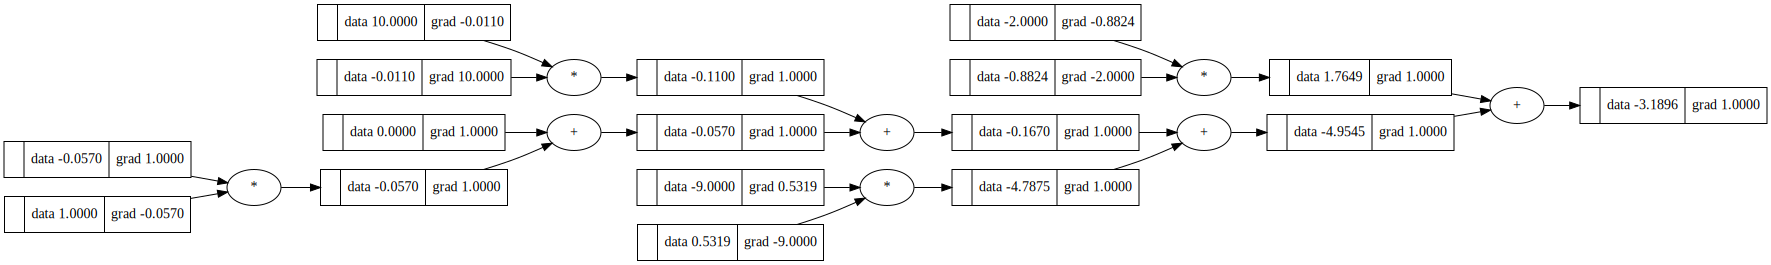

In [24]:
draw_graph(f)